In [16]:

from datetime import datetime

########### Basic Parameters for Running: ################################

DateNow = datetime.today().strftime('%Y%m%d')
TimeNow = datetime.today().strftime('%H%M%S')
    
TFliteNamingAndVersion = "output/cnn-s2-md-" + DateNow + "-" + TimeNow     # Used for tflite Filename
#TFliteNamingAndVersion = "effnet"     # Used for tflite Filename
Load_Model = "output/cnn-s2-md_best.h5"  
ziffer_data_url="images"
output_dir="."
use_grayscale = False
nb_classes = 100
##########################################################################


In [17]:
from b2n.models.prune_quantize import prune, quantization_default
from b2n.data.ziffer import ziffer_data
from b2n.encodings.class_encoding import class_encoding
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from  tensorflow import keras

xz_data, yz_data, fz_data = ziffer_data(ziffer_data_url)
x_data, y_data = shuffle(xz_data, yz_data)
y_data = class_encoding(y_data, nb_classes)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)

model = keras.models.load_model(Load_Model)

# prune the model
model_pruned = model
# pruning reduces the accurracy 
#model_pruned = prune(model=model, x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test)

# quanitize and save the model
tflite_model = quantization_default(model=model_pruned, 
                            x_train=x_test)
# save the model
filename=TFliteNamingAndVersion + "-q.tflite"                                                     
open( filename, "wb").write(tflite_model)


Ziffer data count:  12462


2022-06-19 23:54:48.905597: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Pruning
Baseline test accuracy: 0.0


/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.9/site-packages/tensorflow_model_optimization/python/core/sparsity/keras/pruning_wrapper.py:212: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  mask = self.add_variable(
/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.9/site-packages/tensorflow_model_optimization/python/core/sparsity/keras/pruning_wrapper.py:219: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  threshold = self.add_variable(
/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.9/site-packages/tensorflow_model_optimization/python/core/sparsity/keras/pruning_wrapper.py:233: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  self.pruning_step = self.add_variable(
2022-06-19 23:54:53.50171

  5/281 [..............................] - ETA: 13s - loss: 0.4041 - accuracy: 0.8813 WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0422s vs `on_train_batch_end` time: 0.1208s). Check your callbacks.


281/281 [==============================] - ETA: 0s - loss: 0.4122 - accuracy: 0.8498

2022-06-19 23:55:07.449739: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


281/281 [==============================] - 18s 46ms/step - loss: 0.4122 - accuracy: 0.8498 - val_loss: 0.3709 - val_accuracy: 0.8666
Baseline test accuracy: 0.0
Pruned test accuracy: 0.9130303859710693
INFO:tensorflow:Assets written to: /var/folders/07/sj9pw71n205_354358yc8scm0000gn/T/tmpo0uqh2rz/assets


INFO:tensorflow:Assets written to: /var/folders/07/sj9pw71n205_354358yc8scm0000gn/T/tmpo0uqh2rz/assets
2022-06-19 23:55:22.987372: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:357] Ignored output_format.
2022-06-19 23:55:22.987384: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:360] Ignored drop_control_dependency.
2022-06-19 23:55:22.987460: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: /var/folders/07/sj9pw71n205_354358yc8scm0000gn/T/tmpo0uqh2rz
2022-06-19 23:55:22.990933: I tensorflow/cc/saved_model/reader.cc:78] Reading meta graph with tags { serve }
2022-06-19 23:55:22.990941: I tensorflow/cc/saved_model/reader.cc:119] Reading SavedModel debug info (if present) from: /var/folders/07/sj9pw71n205_354358yc8scm0000gn/T/tmpo0uqh2rz
2022-06-19 23:55:23.002983: I tensorflow/cc/saved_model/loader.cc:228] Restoring SavedModel bundle.
2022-06-19 23:55:23.056411: I tensorflow/cc/saved_model/loader.cc:212] Running initialization

INFO:tensorflow:Assets written to: /var/folders/07/sj9pw71n205_354358yc8scm0000gn/T/tmpmt70dbxg/assets


INFO:tensorflow:Assets written to: /var/folders/07/sj9pw71n205_354358yc8scm0000gn/T/tmpmt70dbxg/assets
/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.9/site-packages/tensorflow/lite/python/convert.py:746: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "
2022-06-19 23:55:36.218247: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:357] Ignored output_format.
2022-06-19 23:55:36.218261: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:360] Ignored drop_control_dependency.
2022-06-19 23:55:36.218345: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: /var/folders/07/sj9pw71n205_354358yc8scm0000gn/T/tmpmt70dbxg
2022-06-19 23:55:36.221991: I tensorflow/cc/saved_model/reader.cc:78] Reading meta graph with tags { serve }
2022-06-19 23:55:36.221998: I tensorflow/cc/saved_model/reader.cc:119] Reading SavedMode

467688

Tested images: 12462. 679 false predicted. Accuracy is: 0.9455143636655432


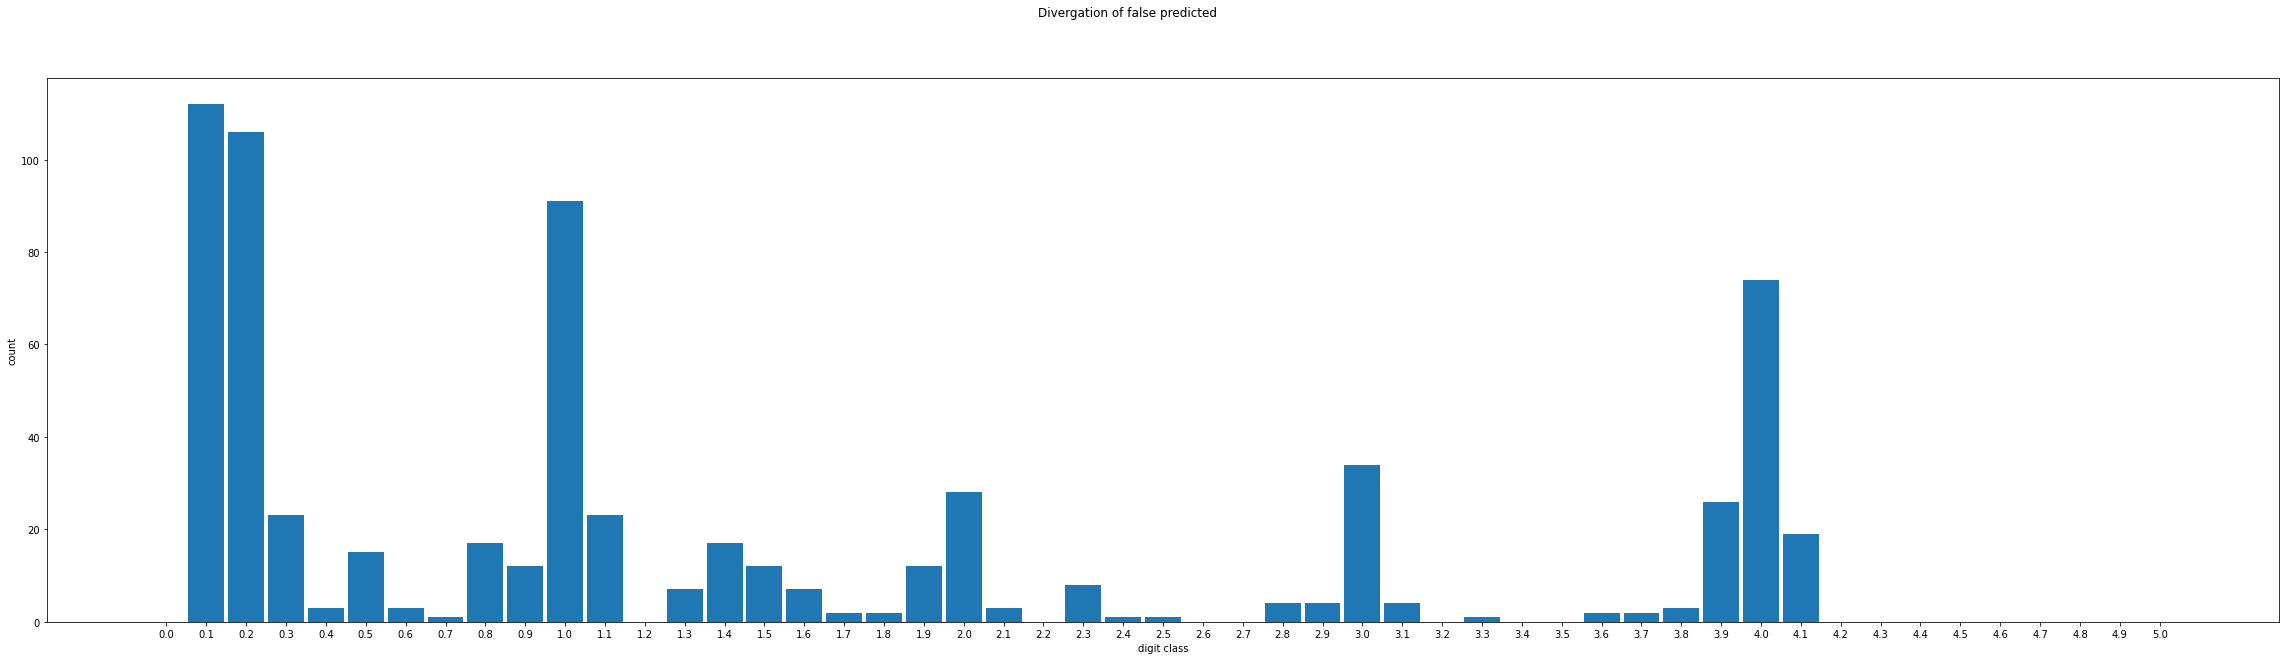

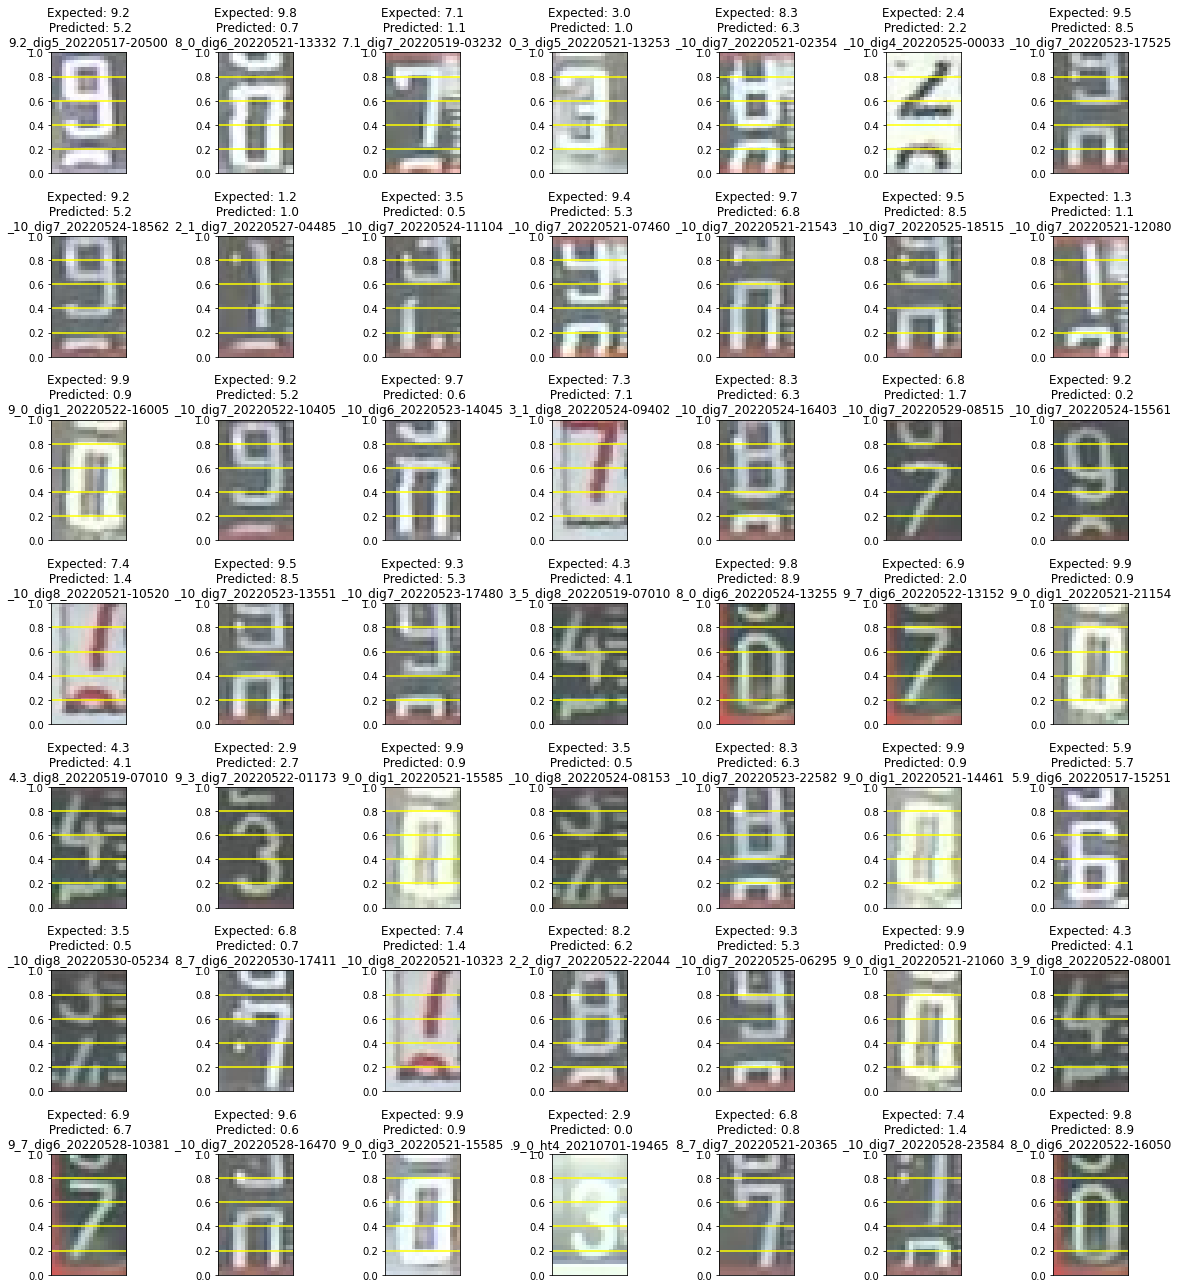

In [18]:
from b2n.plotfunctions import evaluate_ziffer_tflite
import numpy as np
evaluate_ziffer_tflite(filename, xz_data, yz_data, fz_data, "TF-Lite Results", max_delta = 0.11)
    